# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):    
    _,scores,obs_preds,opt,target = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    return obs_preds,opt,target


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


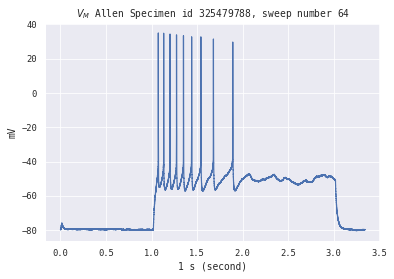

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen 325479788

In [4]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike",
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,model_type="IZHI",efel_filter_iterable=efel_filter_iterable)


INFO:__main__:gen	nevals	avg    	std    	min    	max  
1  	200   	4920.71	8146.33	19.3253	19000
gen	nevals	avg    	std    	min    	max  
1  	200   	4920.71	8146.33	19.3253	19000


INFO:__main__:2  	142   	4573.65	7952.37	19.3253	19000
2  	142   	4573.65	7952.37	19.3253	19000
INFO:__main__:3  	37    	253.777	1505.5 	19.3253	14023.2
3  	37    	253.777	1505.5 	19.3253	14023.2
INFO:__main__:4  	33    	615.113	3219.71	11.5634	19000  
4  	33    	615.113	3219.71	11.5634	19000  
INFO:__main__:5  	31    	624.864	3219.5 	11.5634	19000  
5  	31    	624.864	3219.5 	11.5634	19000  
INFO:__main__:6  	37    	1786.98	5417.1 	11.5634	19000  
6  	37    	1786.98	5417.1 	11.5634	19000  
INFO:__main__:7  	42    	1911.93	5665.52	11.5634	19000  
7  	42    	1911.93	5665.52	11.5634	19000  
INFO:__main__:8  	36    	1920.99	5478.39	11.5634	19000  
8  	36    	1920.99	5478.39	11.5634	19000  
INFO:__main__:9  	31    	1520.02	5126.78	11.5634	19000  
9  	31    	1520.02	5126.78	11.5634	19000  
INFO:__main__:10 	43    	973.552	4116.65	11.5634	19000  
10 	43    	973.552	4116.65	11.5634	19000  
INFO:__main__:11 	33    	964.614	4116.57	11.5634	19000  
11 	33    	964.614	4116.57	11.5634	19000  
INFO

INFO:__main__:84 	37    	943.792	4120.75	1.7852 	19000  
84 	37    	943.792	4120.75	1.7852 	19000  
INFO:__main__:85 	23    	2.71643	3.08355	1.72661	28.9218
85 	23    	2.71643	3.08355	1.72661	28.9218
INFO:__main__:86 	33    	380.758	2646.43	1.72661	19000  
86 	33    	380.758	2646.43	1.72661	19000  
INFO:__main__:87 	34    	191.531	1880.85	1.72661	19000  
87 	34    	191.531	1880.85	1.72661	19000  
INFO:__main__:88 	36    	191.689	1880.84	1.72661	19000  
88 	36    	191.689	1880.84	1.72661	19000  
INFO:__main__:89 	38    	567.823	3224.96	1.72661	19000  
89 	38    	567.823	3224.96	1.72661	19000  
INFO:__main__:90 	28    	2.77583	3.63886	1.72661	24.3991
90 	28    	2.77583	3.63886	1.72661	24.3991
INFO:__main__:91 	34    	380.871	2646.41	1.72661	19000  
91 	34    	380.871	2646.41	1.72661	19000  
INFO:__main__:92 	28    	3.87577	6.16494	1.72661	36.1581
92 	28    	3.87577	6.16494	1.72661	36.1581
INFO:__main__:93 	32    	6.87485	7.61572	1.72661	40.0713
93 	32    	6.87485	7.61572	1.72661	40.0713


INFO:__main__:166	34    	3.75564	6.35912	1.50779	39.7429
166	34    	3.75564	6.35912	1.50779	39.7429
INFO:__main__:167	35    	193.811	1880.63	1.50779	19000  
167	35    	193.811	1880.63	1.50779	19000  
INFO:__main__:168	39    	221.865	1901.49	1.50779	19000  
168	39    	221.865	1901.49	1.50779	19000  
INFO:__main__:169	36    	567.804	3224.97	1.50779	19000  
169	36    	567.804	3224.97	1.50779	19000  
INFO:__main__:170	35    	567.305	3225.05	1.50779	19000  
170	35    	567.305	3225.05	1.50779	19000  
INFO:__main__:171	36    	192.878	1880.72	1.50779	19000  
171	36    	192.878	1880.72	1.50779	19000  
INFO:__main__:172	31    	82.4174	560.047	1.50779	4024.48
172	31    	82.4174	560.047	1.50779	4024.48
INFO:__main__:173	25    	4.60657	3.69739	1.50779	23.3729
173	25    	4.60657	3.69739	1.50779	23.3729
INFO:__main__:174	32    	67.9702	419.817	1.50779	3024.11
174	32    	67.9702	419.817	1.50779	3024.11
INFO:__main__:175	29    	194.019	1880.6 	1.50779	19000  
175	29    	194.019	1880.6 	1.50779	19000  


INFO:__main__:248	36    	577.421	3224.91	1.35859	19000  
248	36    	577.421	3224.91	1.35859	19000  
INFO:__main__:249	28    	190.604	1880.94	1.35859	19000  
249	28    	190.604	1880.94	1.35859	19000  
INFO:__main__:250	37    	232.365	1918.51	1.35859	19000  
250	37    	232.365	1918.51	1.35859	19000  
INFO:__main__:251	26    	2.17773	3.16395	1.35859	25.4461
251	26    	2.17773	3.16395	1.35859	25.4461
INFO:__main__:252	37    	223.733	1901.32	1.35859	19000  
252	37    	223.733	1901.32	1.35859	19000  
INFO:__main__:253	27    	566.925	3225.12	1.35859	19000  
253	27    	566.925	3225.12	1.35859	19000  
INFO:__main__:254	28    	190.335	1880.97	1.35859	19000  
254	28    	190.335	1880.97	1.35859	19000  
INFO:__main__:255	33    	380.351	2646.49	1.35859	19000  
255	33    	380.351	2646.49	1.35859	19000  
INFO:__main__:256	37    	192.252	1880.79	1.35859	19000  
256	37    	192.252	1880.79	1.35859	19000  
INFO:__main__:257	28    	3.24569	5.49768	1.35859	41.6883
257	28    	3.24569	5.49768	1.35859	41.6883


INFO:__main__:330	33    	190.66 	1880.94	1.02998	19000  
330	33    	190.66 	1880.94	1.02998	19000  
INFO:__main__:331	35    	378.763	2646.71	1.02998	19000  
331	35    	378.763	2646.71	1.02998	19000  
INFO:__main__:332	33    	420.104	2670.81	1.02998	19000  
332	33    	420.104	2670.81	1.02998	19000  
INFO:__main__:333	41    	378.752	2646.71	1.02998	19000  
333	41    	378.752	2646.71	1.02998	19000  
INFO:__main__:334	43    	379.813	2646.57	1.02998	19000  
334	43    	379.813	2646.57	1.02998	19000  
INFO:__main__:335	30    	191.314	1880.88	1.02998	19000  
335	30    	191.314	1880.88	1.02998	19000  
INFO:__main__:336	34    	3.59693	8.0299 	1.02998	43.0495
336	34    	3.59693	8.0299 	1.02998	43.0495
INFO:__main__:337	31    	569.153	3224.74	1.02998	19000  
337	31    	569.153	3224.74	1.02998	19000  
INFO:__main__:338	25    	220.41 	1901.83	1.02998	19000  
338	25    	220.41 	1901.83	1.02998	19000  
INFO:__main__:339	32    	2.88984	5.96804	1.02998	30.6345
339	32    	2.88984	5.96804	1.02998	30.6345


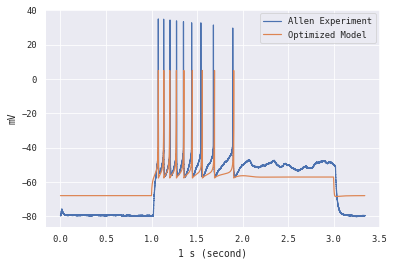

In [5]:

check_bin_vm_soma(target,opt)

In [6]:
opt.attrs_to_params()
params = pd.DataFrame([opt.params])
params

,C,k,vr,vt,vPeak,a,b,c,d,celltype
0,129.21,1.47,-68.07,-45.04,4.98,0.01,0.47,-57.78,-10.96,7


In [7]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.485422,Relative Difference = 0.00
1,mean_frequency,10.086294,10.084034,Relative Difference = 0.00
2,adaptation_index2,0.091943,0.088318,Relative Difference = 0.00
3,ISI_CV,0.476055,0.397611,Relative Difference = 0.08
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,102.250000,Relative Difference = 0.04
6,ISI_values,108.400000,108.471429,Relative Difference = 0.07
7,time_to_first_spike,74.600000,74.500000,Relative Difference = 0.10
8,time_to_last_spike,892.300000,892.500000,Relative Difference = 0.20
9,time_to_second_spike,133.500000,133.200000,Relative Difference = 0.30


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen `325479788` sweep number `64`

In [8]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike",
    "peak_voltage",
    "AHP_depth",
    "AHP_depth_abs",
    "base_voltage",
    "sag_amplitude",
    "voltage_after_stim",
    "spike_half_width"
    ]
obs_preds,opt,target = test_opt_relative_diff(specimen_id = 325479788,efel_filter_iterable=efel_filter_iterable)


INFO:__main__:gen	nevals	avg    	std    	min    	max  
1  	100   	4993.29	7864.78	22.1244	22000
gen	nevals	avg    	std    	min    	max  
1  	100   	4993.29	7864.78	22.1244	22000


INFO:__main__:2  	73    	5147.03	7810.2 	17.7468	22000
2  	73    	5147.03	7810.2 	17.7468	22000
INFO:__main__:3  	15    	33.9109	5.53879	17.7468	42.4067
3  	15    	33.9109	5.53879	17.7468	42.4067
INFO:__main__:4  	19    	35.2288	30.2101	17.7468	241.537
4  	19    	35.2288	30.2101	17.7468	241.537
INFO:__main__:5  	14    	32.1176	6.82149	17.7468	56.2628
5  	14    	32.1176	6.82149	17.7468	56.2628
INFO:__main__:6  	24    	403.325	2632.18	17.7468	19015.5
6  	24    	403.325	2632.18	17.7468	19015.5
INFO:__main__:7  	17    	25.1445	4.70049	17.7468	37.8188
7  	17    	25.1445	4.70049	17.7468	37.8188
INFO:__main__:8  	15    	26.9418	4.61367	17.7468	37.8188
8  	15    	26.9418	4.61367	17.7468	37.8188
INFO:__main__:9  	15    	25.6146	4.49005	17.7468	37.4018
9  	15    	25.6146	4.49005	17.7468	37.4018
INFO:__main__:10 	15    	26.3376	6.67404	17.7468	40.0658
10 	15    	26.3376	6.67404	17.7468	40.0658
INFO:__main__:11 	15    	458.111	3046.49	16.0855	22000  
11 	15    	458.111	3046.49	16.0855	22000  
INFO

INFO:__main__:84 	17    	13.9902	6.33988	3.79337	31.3994
84 	17    	13.9902	6.33988	3.79337	31.3994
INFO:__main__:85 	16    	11.6638	5.66169	3.79337	25.3727
85 	16    	11.6638	5.66169	3.79337	25.3727
INFO:__main__:86 	19    	13.3594	5.02917	3.79337	30.274 
86 	19    	13.3594	5.02917	3.79337	30.274 
INFO:__main__:87 	13    	12.2091	5.34863	3.79337	25.8418
87 	13    	12.2091	5.34863	3.79337	25.8418
INFO:__main__:88 	14    	12.4301	6.36375	3.79337	29.1587
88 	14    	12.4301	6.36375	3.79337	29.1587
INFO:__main__:89 	13    	11.8401	6.1103 	3.79337	22.7265
89 	13    	11.8401	6.1103 	3.79337	22.7265
INFO:__main__:90 	12    	11.7446	4.40185	3.79337	25.0518
90 	12    	11.7446	4.40185	3.79337	25.0518
INFO:__main__:91 	18    	12.6258	3.30856	3.79337	24.5053
91 	18    	12.6258	3.30856	3.79337	24.5053
INFO:__main__:92 	20    	12.7655	4.06947	3.79337	21.1901
92 	20    	12.7655	4.06947	3.79337	21.1901
INFO:__main__:93 	15    	11.6513	3.33182	3.79337	20.5275
93 	15    	11.6513	3.33182	3.79337	20.5275


INFO:__main__:166	20    	10.9851	3.81287	3.17862	24.3153
166	20    	10.9851	3.81287	3.17862	24.3153
INFO:__main__:167	17    	10.7017	5.72651	3.17862	27.5709
167	17    	10.7017	5.72651	3.17862	27.5709
INFO:__main__:168	16    	10.1073	3.78613	3.17862	20.6892
168	16    	10.1073	3.78613	3.17862	20.6892
INFO:__main__:169	17    	11.7197	5.61248	3.17862	31.8775
169	17    	11.7197	5.61248	3.17862	31.8775
INFO:__main__:170	19    	11.0041	4.89887	3.17862	25.0637
170	19    	11.0041	4.89887	3.17862	25.0637
INFO:__main__:171	13    	10.0047	3.40694	3.17862	17.4373
171	13    	10.0047	3.40694	3.17862	17.4373
INFO:__main__:172	15    	12.1931	3.74504	3.17862	24.447 
172	15    	12.1931	3.74504	3.17862	24.447 
INFO:__main__:173	14    	10.5559	5.12695	3.17862	31.2509
173	14    	10.5559	5.12695	3.17862	31.2509
INFO:__main__:174	19    	11.5943	3.59505	3.17862	23.0723
174	19    	11.5943	3.59505	3.17862	23.0723
INFO:__main__:175	12    	10.7187	4.60045	3.17862	28.1004
175	12    	10.7187	4.60045	3.17862	28.1004


INFO:__main__:248	16    	9.03063	3.85823	3.17862	18.0896
248	16    	9.03063	3.85823	3.17862	18.0896
INFO:__main__:249	15    	9.57658	2.79789	3.17862	15.6051
249	15    	9.57658	2.79789	3.17862	15.6051
INFO:__main__:250	18    	11.0157	3.76125	3.17862	21.05  
250	18    	11.0157	3.76125	3.17862	21.05  
INFO:__main__:251	17    	11.2421	5.19033	3.17787	28.9319
251	17    	11.2421	5.19033	3.17787	28.9319
INFO:__main__:252	15    	10.422 	3.74475	3.17787	19.9019
252	15    	10.422 	3.74475	3.17787	19.9019
INFO:__main__:253	16    	12.2493	4.45164	3.17787	25.8525
253	16    	12.2493	4.45164	3.17787	25.8525
INFO:__main__:254	20    	10.0189	2.91611	3.17787	17.1272
254	20    	10.0189	2.91611	3.17787	17.1272
INFO:__main__:255	12    	9.08156	4.06881	3.17787	26.1904
255	12    	9.08156	4.06881	3.17787	26.1904
INFO:__main__:256	13    	10.8053	5.74492	3.17787	26.1904
256	13    	10.8053	5.74492	3.17787	26.1904
INFO:__main__:257	19    	11.2989	5.6503 	3.17787	26.2963
257	19    	11.2989	5.6503 	3.17787	26.2963


INFO:__main__:330	13    	11.4469	4.13477	1.74751	20.0454
330	13    	11.4469	4.13477	1.74751	20.0454
INFO:__main__:331	23    	13.1462	5.08267	1.74751	27.3686
331	23    	13.1462	5.08267	1.74751	27.3686
INFO:__main__:332	16    	12.3797	6.60989	1.74751	27.3686
332	16    	12.3797	6.60989	1.74751	27.3686
INFO:__main__:333	17    	11.1446	6.82633	1.73832	27.3686
333	17    	11.1446	6.82633	1.73832	27.3686
INFO:__main__:334	13    	9.01622	5.74507	1.73832	27.3686
334	13    	9.01622	5.74507	1.73832	27.3686
INFO:__main__:335	16    	13.051 	7.18762	1.73832	29.4078
335	16    	13.051 	7.18762	1.73832	29.4078
INFO:__main__:336	8     	7.76927	3.7507 	1.73832	22.8513
336	8     	7.76927	3.7507 	1.73832	22.8513
INFO:__main__:337	15    	10.9712	5.18534	1.73832	22.8513
337	15    	10.9712	5.18534	1.73832	22.8513
INFO:__main__:338	18    	9.49007	4.6205 	1.73832	25.4293
338	18    	9.49007	4.6205 	1.73832	25.4293
INFO:__main__:339	20    	8.98226	5.38702	1.73832	31.2579
339	20    	8.98226	5.38702	1.73832	31.2579


In [9]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.504552,Relative Difference = 0.02
1,mean_frequency,10.086294,10.172940,Relative Difference = 0.09
2,adaptation_index2,0.091943,0.093495,Relative Difference = 0.00
3,ISI_CV,0.476055,0.443410,Relative Difference = 0.03
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,101.337500,Relative Difference = 0.87
6,ISI_values,108.400000,107.314286,Relative Difference = 1.09
7,time_to_first_spike,74.600000,74.000000,Relative Difference = 0.60
8,time_to_last_spike,892.300000,884.700000,Relative Difference = 7.60
9,time_to_second_spike,133.500000,133.500000,Relative Difference = 0.00


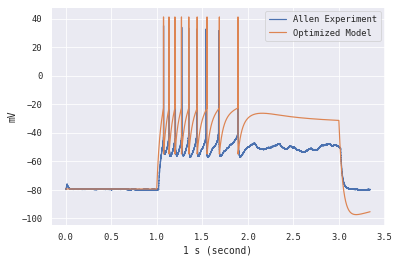

In [11]:
check_bin_vm_soma(target,opt)


In [12]:
opt.attrs_to_params()
params = pd.DataFrame([opt.params])
params


,cm,v_spike,v_reset,v_rest,tau_m,a,b,delta_T,tau_w,v_thresh,spike_delta
0,911.98,-34.31,-55.09,-79.35,42.58,10.61,19.9,6.84,352.52,-22.6,41.15


# Other EFEL features to try:
```
*"peak_voltage",
*"AHP_depth",
*"AHP_depth_abs",
*"base_voltage",
*"sag_amplitude",
*"voltage_after_stim",
*"spike_half_width"
*"voltage_after_stim"
These features all relate to spike shape.
```